# Pymaceuticals Inc.
---

### Analysis

Our testing showed positive results for Capomulin when compared against other treatments. Capomulin scored well, with the 2nd lowest average and median tumor volumes in the study, as well as in consistency with the 2nd lowest variance, standard deviation, and standard error of the mean. These all ranked only behind Ramicane as the most effective treamtment in the study. It should be noted, this study possessed a male gender bias of 1%.

Further analysis of the timepoints show that subjects treated with Ramicane and Capomulin had the highest number of observed timepoints indicating a higher efficacy rate in the subjects. It should be noted that Ramicane and Capomulin were the only treatments to have their total observed timepoints in the 200s, definitively outperforming the remaining treatments in this area.

When analyzing the final tumor volume for each subject in the treatment regimen for Capomulin, Ramicane, Infubinol, and Ceftamin, the only one that returned any potential outliers was subject 31 from Infubinol, with a tumor volume of 36.32 cubic milimeters. This only further strengthens the consistency of the test.

A closer look at Mouse l509 shows the effect's of Capomulin treatment on the subject's overall tumor volume. At day 20, the treatment takes effect and significantly reduces the tumor volume over the next 5-6 days. Over the next 5 days, the tumor would slowly grow again, then after 5 more days, the treatment significantly reduced the tumor volume again. The effect did not repeat itself on day 40, which was what it was trending toward. Rather, it continued to grow, albeit roughly 4 cubic millimeters lower that at the beginning of the test.

Finally, taking a look at the Capomulin's average tumor volume compared to the overall weight of the subject shows a strong correllation between the two, with a p-value of 0.84. With this, it becomes very evident that subjects will need to have their weight carefully monitored over the course of their treatment and there is a much higher potential for larger tumors to be present on heavier subjects.

In [328]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [329]:
# Checking the number of mice.
mice_count = len(mouse_study_df["Mouse ID"].unique())
print(mice_count)

249


In [330]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint_df = mouse_study_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint_df[mouse_timepoint_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [331]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989",:]
duplicated_mouse.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [332]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicated_rows = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
clean_mouse_study_df = mouse_study_df[~mouse_study_df.index.isin(duplicated_rows.index)]
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [333]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_study_df["Mouse ID"].unique())
print(clean_mice_count)

248


## Summary Statistics

In [334]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_grouping = clean_mouse_study_df.groupby("Drug Regimen")
tum_drug_sumstats = drug_grouping["Tumor Volume (mm3)"].describe()
tum_drug_mean = tum_drug_sumstats["mean"]
tum_drug_median = tum_drug_sumstats["50%"]
tum_drug_std = tum_drug_sumstats["std"]
tum_drug_var = tum_drug_std ** 2
tum_drug_sem = tum_drug_std / (tum_drug_sumstats["count"] ** .5)

# Assemble the resulting series into a single summary DataFrame.
tum_drug_summary = pd.DataFrame({
                                "Mean Tumor Volume": tum_drug_mean,
                                "Median Tumor Volume": tum_drug_median,
                                "Tumor Volume Variance": tum_drug_var,
                                "Tumor Volume Std. Dev.": tum_drug_std,
                                "Tumor Volume Std. Err.": tum_drug_sem
                                })
tum_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [335]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tum_drug_summary = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Use MultiIndex to specify the unit the summary statistics are based off of
agg_tum_drug_summary.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], agg_tum_drug_summary.columns])
agg_tum_drug_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

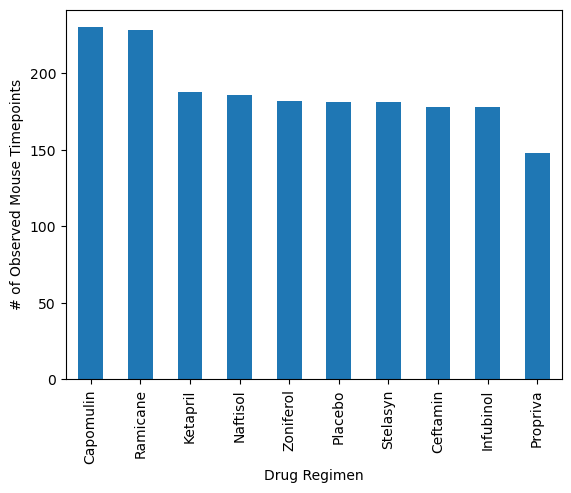

In [336]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_observed = clean_mouse_study_df["Mouse ID"].groupby(clean_mouse_study_df["Drug Regimen"]).count().sort_values(ascending=False)
total_observed.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

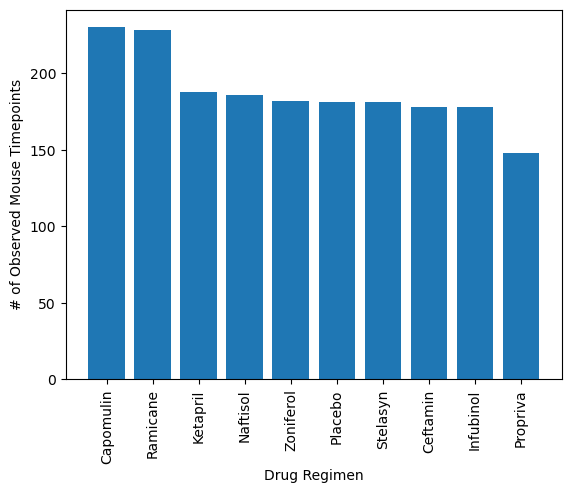

In [337]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_observe = total_observed.values
drug_name = total_observed.index
plt.bar(drug_name, num_observe)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

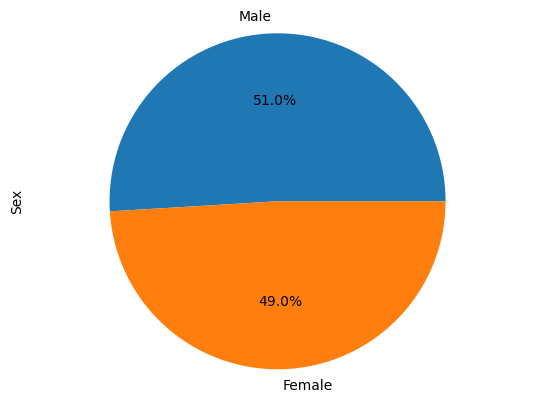

In [338]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_study_df["Sex"].value_counts()
gender_data.plot(kind="pie", labels=gender_data.index, autopct="%1.1f%%", ylabel="Sex")
plt.axis("equal")
plt.show()

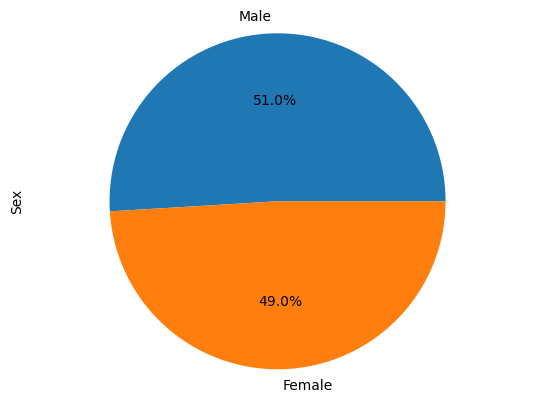

In [339]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [340]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_tumor_df = pd.merge(last_timepoint, clean_mouse_study_df, on=["Mouse ID", "Timepoint"], how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [341]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_sort = final_tumor_df[final_tumor_df["Drug Regimen"] == treatment]
    tumor_vol = treatment_sort["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

#   # Store the minimum and maximum tumor volume values for the boxplot
    min_tumor_vol = min(min(tumor_vol) for tumor_vol in tumor_vol_data)
    max_tumor_vol = max(max(tumor_vol) for tumor_vol in tumor_vol_data)

#   # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

#   # Add subset 
    treatment_outliers = {}
    
#   # Determine outliers using upper and lower bounds
    outlier_range = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    treatment_outliers[treatment] = outlier_range
    for treatment, treatment_outliers in treatment_outliers.items():
        print(f"{treatment}'s potential outliers: {treatment_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


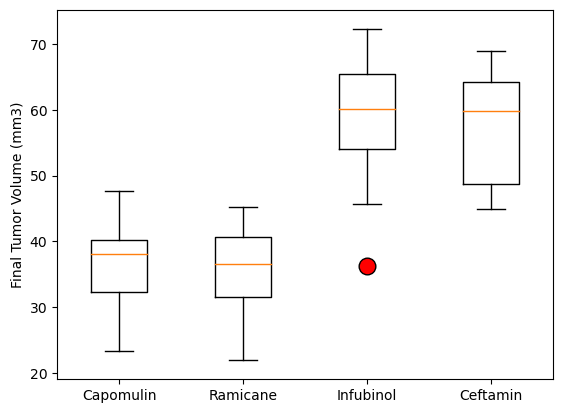

In [342]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops= dict(markerfacecolor = "red", markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(min_tumor_vol - 3, max_tumor_vol + 3)
plt.grid(axis="y", linestyle="")
plt.show()

## Line and Scatter Plots

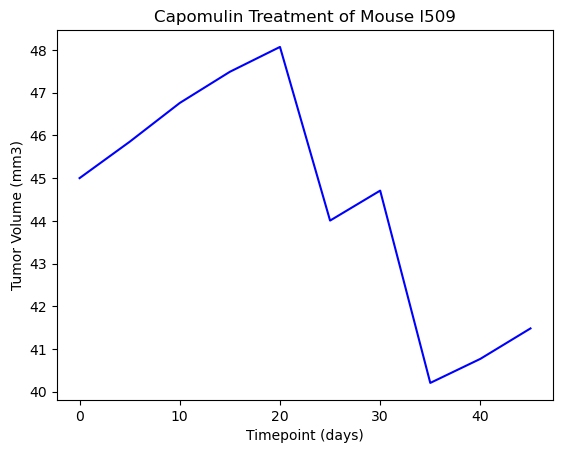

In [343]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509  = clean_mouse_study_df[(clean_mouse_study_df["Mouse ID"] == "l509") & (clean_mouse_study_df["Drug Regimen"] == "Capomulin")]
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
# Show the chart
plt.show()

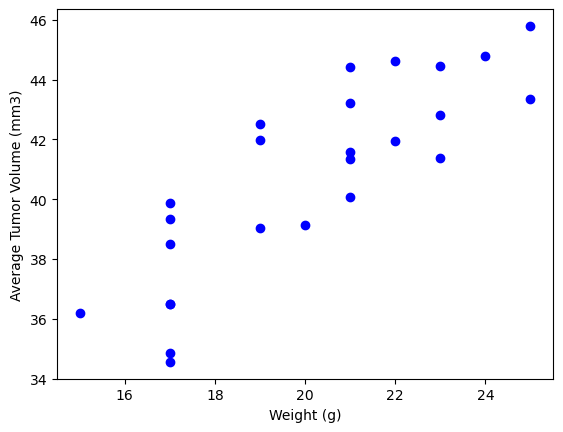

In [344]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
avg_capo_tumor = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(capomulin_weight, avg_capo_tumor, marker="o", color = "b")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


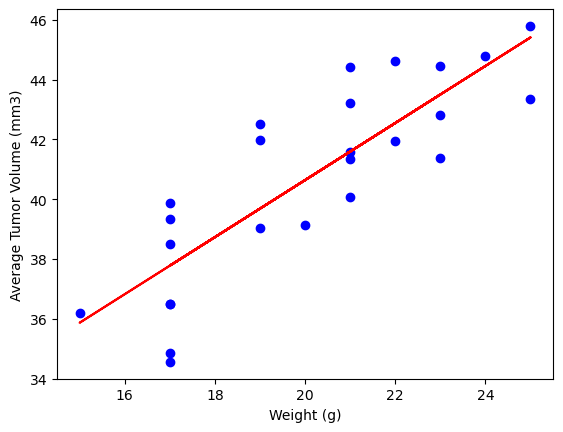

In [345]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(capomulin_weight, avg_capo_tumor)[0],2)}")

p_slope, p_int, p_r, p_p, p_std_err = st.linregress(capomulin_weight, avg_capo_tumor)
p_fit = p_slope * capomulin_weight + p_int
plt.scatter(capomulin_weight, avg_capo_tumor, marker="o", color = "b")
plt.plot(capomulin_weight, p_fit, "-", color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()